# SVM Guided Example + Challenge

https://www.svm-tutorial.com/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model
from sklearn import preprocessing
np.set_printoptions(suppress=True)
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

/Users/wliao/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count   20052.000
mean        3.714
std         1.341
min         0.000
25%         3.750
50%         4.375
75%         4.375
max         5.000
Name: rating, dtype: float64

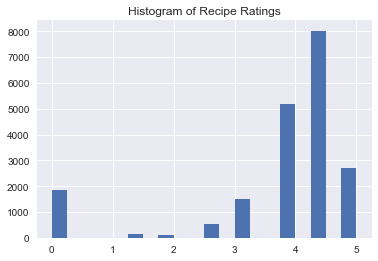

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

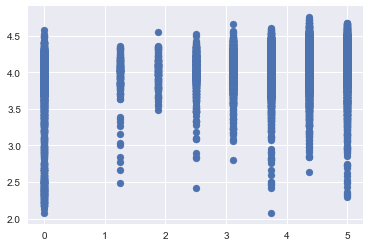

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

0.038565706512988962

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

## Challenge

### Preparation

In [11]:
# Create variables for binary classifier
raw_data['rating_class'] = np.where((raw_data['rating'] > 3),'1','0')

In [12]:
# Drop original 'rating' attribute
raw_data = raw_data.drop('rating',axis=1)

In [13]:
# Drop rows with missing values
df = raw_data
df = df.dropna()

In [14]:
# Reduce data set to only numeric variables
df = df.drop('title',axis=1)

In [15]:
# Assign features and target variable
x = df.drop('rating_class',axis=1)
y = df['rating_class']

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind = "regular")
X_sm, Y_sm = smote.fit_sample(x,y)

In [17]:
cols = df.columns
cols = cols.drop('rating_class')

sm_features = pd.DataFrame(data=X_sm,columns=cols)

sm_target = pd.DataFrame(data=Y_sm, columns = ['rating_class'])

frames = [sm_features, sm_target]
sm_data = pd.concat(frames)

x = sm_features
y = sm_target.values.ravel()

### Feature Selection

#### Extra Trees Classifier

In [18]:
# Select top 30 attributes from data 
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate model
forest = ExtraTreesClassifier(n_estimators=250)

# Fit model to data
forest.fit(x,y)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 61 (0.051061)
2. feature 244 (0.035623)
3. feature 36 (0.022990)
4. feature 457 (0.022166)
5. feature 190 (0.021593)
6. feature 578 (0.020919)
7. feature 506 (0.020369)
8. feature 628 (0.018122)
9. feature 601 (0.016859)
10. feature 665 (0.015829)
11. feature 466 (0.015753)
12. feature 314 (0.015249)
13. feature 208 (0.014521)
14. feature 640 (0.013707)
15. feature 12 (0.013589)
16. feature 548 (0.013205)
17. feature 658 (0.011952)
18. feature 0 (0.011952)
19. feature 638 (0.011259)
20. feature 3 (0.011165)
21. feature 1 (0.010432)
22. feature 2 (0.010317)
23. feature 309 (0.010242)
24. feature 175 (0.009505)
25. feature 409 (0.009258)
26. feature 625 (0.009193)
27. feature 281 (0.009086)
28. feature 426 (0.009014)
29. feature 180 (0.008057)
30. feature 564 (0.007870)
31. feature 585 (0.007478)
32. feature 546 (0.007336)
33. feature 524 (0.006948)
34. feature 310 (0.006896)
35. feature 138 (0.006665)
36. feature 381 (0.006408)
37. feature 183 (0.006368)
38. 

In [19]:
rf_features = x[x.columns[[indices[0:30]]]]

#### Mutual Information

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Instantiate selector
selector = SelectKBest(mutual_info_classif,k=30)

# Fit selector
selector.fit(x,y)

# Assign indices of selected features to idxs_selected
idxs_selected = selector.get_support(indices=True)

# Assign selected features to mi_features
mi_features = x[x.columns[[idxs_selected]]]

#### PCA 

In [21]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

pca = PCA(n_components=17)

# Assign features and target variable to 'X' and 'Y' respectively
X = x
X_scaled = preprocessing.scale(x)

X_pca = pca.fit_transform(X_scaled)

Y = y

[ 0.01272248  0.00969273  0.00778764  0.0055321   0.00539016  0.00484519
  0.00444441  0.00437651  0.00423611  0.00397065  0.00388991  0.00382843
  0.00370609  0.00358495  0.00347987  0.00343162  0.00338005]


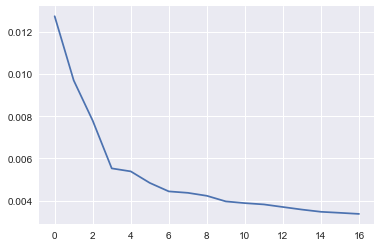

In [22]:
# Evaluate explained variance ratio -- it appears that the first component explains
# most of the data set. 
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [23]:
sum(pca.explained_variance_ratio_)

0.088298899044324183

### Modeling

The model performs significantly better after feature selection/reduction.

#### SVM using features from Extra Trees

In [24]:
from sklearn.svm import SVC

# Instantiate SVR
svc = SVC()

# Fit SVR
svc.fit(rf_features,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# Evaluate performance
svc.score(rf_features,y)

0.98176803495952436

In [26]:
from sklearn.model_selection import cross_val_score

# Cross validate
scores = cross_val_score(svc, rf_features, y, cv=5)

In [27]:
# Evaluate performance
scores

array([ 0.88073066,  0.85207736,  0.85351003,  0.84992837,  0.85560731])

In [38]:
np.mean([ 0.88073066,  0.85207736,  0.85351003,  0.84992837,  0.85560731])

0.85837074599999996

#### SVM using features from Mutual Information 

In [28]:
from sklearn.svm import SVC

# Instantiate SVR
svc = SVC()

#
svc.fit(mi_features,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
# Evaluate performance
svc.score(mi_features,y)

0.98219786517658858

In [30]:
from sklearn.model_selection import cross_val_score

# Cross validate
scores = cross_val_score(svc, mi_features, y, cv=5)

In [31]:
# Evaluate scores 
scores

array([ 0.88144699,  0.8527937 ,  0.85351003,  0.85082378,  0.85578646])

In [37]:
np.mean([ 0.88144699,  0.8527937 ,  0.85351003,  0.85082378,  0.85578646])

0.85887219199999998

#### SVM using principal component analysis

In [32]:
from sklearn.svm import SVC

# Instantiate SVR
svc = SVC()

#
svc.fit(X_pca,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# Evaluate performance
svc.score(X_pca,y)

0.89067984812665668

In [34]:
from sklearn.model_selection import cross_val_score

# Cross validate
scores = cross_val_score(svc, X_pca, y, cv=5)

In [35]:
# Evaluate scores 
scores

array([ 0.82037966,  0.85494269,  0.84670487,  0.85333095,  0.85542816])

In [36]:
np.mean(scores)

0.84615726562764682

## Conclusion

With significant feature reduction (30 parameters kept from original data), we're able to achieve significantly better performance wit SVC. Features selected from random forests and mutual information performed slightly better than princple components where ~90% of the explained variance was retained for the SVC. 